In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist     import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [5]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold.fits'

In [6]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'FALSE'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0)])

##  VMAX

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax.sort('MCOLOR_0P0')
vmax

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

##  LUMFN

In [8]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_lumfn.fits'

In [9]:
# read in TMR stepwise digitalisation
fpath     = '/cosma/home/durham/dc-wils7/DESI/data/tmr_ref_stepwise.txt'
lumfn_TMR = Table.read(fpath, format='ascii', names=['Ms', 'PHI_STEP'])

/tmp/ipykernel_211175/3680491744.py:8: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=2.)
/tmp/ipykernel_211175/3680491744.py:9: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn['IVMAXMEAN_M'], np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=0., marker='.')


Text(0.5, 1.0, 'GAMA')

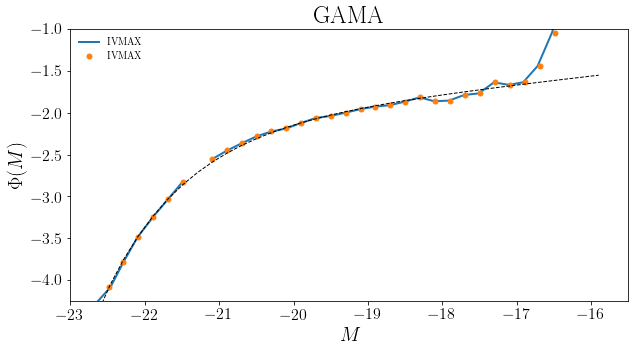

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

pl.sca(ax)

# pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR STEPWISE', lw=2.)

# pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_N'] / 0.77), label='RAW', lw=2.)
pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=2.)
pl.plot(lumfn['IVMAXMEAN_M'], np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=0., marker='.')

pl.plot(lumfn['MEDIAN_M'],    np.log10(named_schechter(lumfn['MEDIAN_M'], 'TMR')), linestyle='--', c='k', lw=1.)


# pl.scatter(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], s=0.5)
# pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR_SWML', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [18]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
gold  = Table.read(fpath)
gold

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32
186172,587725041703977119,183.36147981,-1.47603946,18.018501,0.12797,4,G12_Y1_GS2_031,6,19.953535,18.68423,18.02194,17.65001,17.319805,0.12797,422.00428891516066,38.12658432403494,G12,0,0,-373.3596109871224,-21.929760909860484,-9.63710564553418,373.49266132369706,19.32584906979296,-10.046433711321933,0.6622906,18.018501
240048,587726014549721294,220.35365668,1.52173696,18.241734,0.08419,4,G15_Y1_GN2_360,6,20.009663,18.799726,18.24281,17.873219,17.704176,0.08419,269.2245786693688,37.1505735298624,G15,0,0,-189.16752438979816,-160.73053177087175,6.59439869998412,190.29078744208968,159.40758848267123,6.38585703999604,0.5569172,18.241734
220544,587726013996073093,182.08402727,1.54607143,18.739721,0.21431,4,G12_Y1_EX2_399,6,21.580355,19.697283,18.532803,17.982117,17.715078,0.21431,747.1847629934595,39.367140034690664,G12,0,0,-614.6854523330815,-22.367903669549293,16.60170277623398,614.8443019907271,18.081253480015427,15.927885662972182,1.1644802,18.739721
696407,587722984422768817,176.2539266,0.96075327,19.308483,0.26544,4,G12_Y2_032_143,4,22.646307,20.605484,19.284819,18.736702,18.39961,0.26544,953.7866843264428,39.89725627509861,G12,0,0,-752.0032833648487,49.23714171213921,12.638006887407187,751.655077762792,-54.479547099735385,11.814252189604048,1.3206654,19.308483
7789,588848900986110711,179.30135256,0.76409281,19.518755,0.26327,4,G12_Y2_033_140,5,21.71862,20.247671,19.471909,19.237104,19.014057,0.26327,944.8162862114375,39.87673685396928,G12,0,0,-747.7910677810731,9.118790502094468,9.973826028407293,747.7197862312338,-14.332800063481145,9.154382539635934,0.77576256,19.518755
78743,587722983367508318,218.42715105,0.14264876,18.302853,0.03048,3,G15_Y6_080_197,6,19.975256,18.723587,18.40436,18.310389,18.629835,0.03048,93.61897507751773,34.856819411226134,G15,0,0,-71.1714777111325,-56.464752068538516,0.2261878243947342,71.56367236814782,55.967111691722714,0.14775909546764165,0.31922722,18.302853
397491,587728307496026245,178.30895126,1.61686552,19.131966,0.0772,5,579874220561950720,6,20.226706,19.48654,19.09197,18.710066,18.66265,0.0772,245.62095549441392,36.95132708244647,G12,0,0,-227.8279057101566,6.726149882300808,6.433727667548955,227.78238081330525,-8.314595049994736,6.184097702364939,0.3945694,19.131966
85897,587722983889502489,184.47242736,0.47895984,19.485579,0.09972,4,G12_Y1_HD1_343,5,21.157537,19.792309,19.29044,18.984407,18.91735,0.09972,322.45105257690625,37.54231899471532,G12,0,0,-292.30890478794095,-22.863674985782136,2.4510551579248236,292.46373400595115,20.824894457139948,2.1305364848986357,0.5018692,19.485579


##  Cobaya

In [ ]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [ ]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [ ]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [ ]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [ ]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [ ]:
# g = plots.get_subplot_plotter()

In [ ]:
# g.triangle_plot([samples], filled=True)        

# Done.